# TRABAJO FIN DE MASTER - Tratamientos Dataframe Original
# **Author**: Cristóbal León-Salas
# **Date**: 2025-07-30

# LIBRERIAS

Se cargan las siguietnes librerias:

-  pandas --> Para tablas de datos.
-  numpy --> para cálculos numéricos y para trabajar con matrices y vectores.
-  os --> Para trabajar con directorios, archivos, carpetas,...
-  matplotlib --> Para hacer visualizaciones gráficas básicas.
-  seaborn --> Para gráficos estadísticos más profesionales y de fácil interpretación.
-  warnings --> Para evitar mensajes de advertencias
-  product -->  Para sacar todas las combinaciones posibles entre los elementos de dos o más lista
-  display --> Para sacar tablas con formato.
-  KNeighborsRegressor --> Para obtener pronóstico con K-vecinos
-  ExponentialSmoothing --> Para hacer predicciones con suavizados exponenciales (Holt-Winters)
-  folium --> Para representación georreferenciada


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from itertools import product
from IPython.display import display
import folium
# Ignorar el SettingWithCopyWarning
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
sns.set()

# FUNCIONES

## FUNCIÓN asignar_zona

Esta funcion me va a permitir clasificar las estaciones en una zona u otra

In [2]:
def asignar_zona(lat, lon):
    if lat >= lat_60:
        zona_ns = 'Norte'
    elif lat <= lat_30:
        zona_ns = 'Sur'
    else:
        zona_ns = ''

    if lon <= lon_30:
        zona_ew = 'Oeste'
    elif lon >= lon_60:
        zona_ew = 'Este'
    else:
        zona_ew = ''

    if zona_ns and zona_ew:
        return zona_ns + zona_ew  # Ej: 'Noreste', 'Suroeste'
    elif zona_ns:
        return zona_ns
    elif zona_ew:
        return zona_ew
    else:
        return 'Centro'

# LECTURA DATOS

In [3]:
# leo los datos generados del preprocesado inicial:
df = pd.read_parquet('01_DATASET_FINAL.parquet', engine='pyarrow')

In [4]:
# Saco información de la base de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458361 entries, 0 to 1458360
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   ESTACION                 1458361 non-null  int64         
 1   MAGNITUD                 1458361 non-null  int64         
 2   TECNICA                  1458361 non-null  category      
 3   DIA/MES/ANO              1458361 non-null  datetime64[ns]
 4   MEDICION_ugm3            1015726 non-null  float64       
 5   TEMPERATURA_MAX (°C)     1458198 non-null  float64       
 6   TEMPERATURA_MIN (°C)     1458198 non-null  float64       
 7   TEMPERATURA_MED (°C)     1458198 non-null  float64       
 8   PRECIPITACIONES (mm)     1458198 non-null  float64       
 9   HUMEDAD_MAX (%)          1458198 non-null  float64       
 10  HUMEDAD_MIN (%)          1458198 non-null  float64       
 11  HUMEDAD_MED (%)          1458198 non-null  float64       
 12  

# DATOS AUSENTES

## NAN DATA POR CADA VARIABLE

In [5]:
# Se monta una tabla 
na_table = pd.DataFrame({
    'column': df.columns,
    'missing_values': df.isna().sum().values,
    'missing_percentage': (df.isna().sum().values / len(df)) * 100
})

# Se ordena la tabla por número de valores ausentes
na_table = na_table.sort_values(by='missing_values', ascending=False)

# Reseteamos los índices una vez la tabla ha sido ordenada
na_table.reset_index(drop=True, inplace=True)

# Se muestra la tabla
display(na_table)

,column,missing_values,missing_percentage
0,MEDICION_ugm3,442635,30.351538
1,TEMPERATURA_MAX (°C),163,0.011177
2,TEMPERATURA_MIN (°C),163,0.011177
3,HUMEDAD_MAX (%),163,0.011177
4,PRECIPITACIONES (mm),163,0.011177
5,HUMEDAD_MIN (%),163,0.011177
6,TEMPERATURA_MED (°C),163,0.011177
7,VIENTO_MIN_10 (km/h),163,0.011177
8,VIENTO_MAX_10 (km/h),163,0.011177
9,NIEVE (cm),163,0.011177


Dado los resultados anteriores, comienzo por los datos ausentes de las variables meteorológicas.

Seguramente, al tratarse del mismo número de datos ausentes en cada variable, todos ellos se encuentren en las mismas filas del dataframe, por ello, filtro el dataframe por los datos ausentes de una de las variables y muestro este dataframe, para corroborar lo indicado anteriormente.

In [6]:
# Filtro el dataframe por los datos ausentes de la variable TEMPERATURA_MIN (°C)
df_missing_temp_min = df[df['TEMPERATURA_MIN (°C)'].isna()]

# Muestro el dataframe
display(df_missing_temp_min)

,ESTACION,MAGNITUD,TECNICA,DIA/MES/ANO,MEDICION_ugm3,TEMPERATURA_MAX (°C),TEMPERATURA_MIN (°C),TEMPERATURA_MED (°C),PRECIPITACIONES (mm),HUMEDAD_MAX (%),...,VIENTO_MAX_100 (km/h),VIENTO_MIN_100 (km/h),VIENTO_MED_100 (km/h),VIENTO_DIR_100 (°),NUBES (%),HORAS_SOL (min),RADIACION_SOLAR (W/mÂ²),PRESION_MAX (hPa),PRESION_MIN (hPa),PRESION_MED (hPa)
8946,4,1,38,2025-06-30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17893,4,6,48,2025-06-30,200.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26840,4,7,8,2025-06-30,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35787,4,8,8,2025-06-30,27.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44734,4,12,8,2025-06-30,30.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422572,48,7,8,2025-06-30,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431519,48,8,8,2025-06-30,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440466,48,12,8,2025-06-30,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1449413,48,10,47,2025-06-30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Por lo que puedo observar, todos los datos ausentes de la variable meteorológica se centran en un día concreto, en este caso el 30 de junio de 2025

In [7]:
# Contamos los valores únicos de DIA/MES/ANO en el dataframe generado
unique_dates = df_missing_temp_min['DIA/MES/ANO'].nunique()

print(f"Número de valores de DIA/MES/ANO con datos ausentes de 'TEMPERATURA_MIN (°C)': {unique_dates}")

Número de valores de DIA/MES/ANO con datos ausentes de 'TEMPERATURA_MIN (°C)': 1


Se confirma lo indicado arriba, todos los datos ausentes de los datos meteorológicos se centran en el último día del dataframe, esto es el 30 de junio de 2025

## IMPUTACIÓN DATOS METEOROLÓGICOS

Comenzamos por imputar los datos meteorológicos métodos de imputación por promedio de días similares, dado que solo falta un día y, casualmente, es el último de toda la serie temporal.

Comenzamos por la lectura de los datos meteorológicos originales, se renombran las columnas, se la variable DIA/MES/ANO a variable temporal y el resto se pasan a numéricas.

In [8]:
# Cargar datos meteorológicos
df_meteo_raw = pd.read_csv("97_25.07.19_DATOS METEOROLÓGICOS.csv", header=None)

# Seleccionamos las filas 8 y 9 como strings
fila_8 = df_meteo_raw.iloc[8].astype(str)
fila_9 = df_meteo_raw.iloc[9].astype(str)

# Combinamos las dos filas en una sola lista de nombres de columna
nuevos_headers = fila_9 + "_" + fila_8

# Asignamos como nuevos encabezados
df_meteo_raw.columns = nuevos_headers

# Eliminamos las filas anteriores (hasta la 9 inclusive)
df_meteo = df_meteo_raw.iloc[10:].reset_index(drop=True)
df_meteo.columns = nuevos_headers

# Extraer los primeros 8 caracteres de 'timestamp' y convertirlos a datetime
df_meteo["DIA/MES/ANO"] = pd.to_datetime(df_meteo["timestamp_aggregation"].str[:8], format="%Y%m%d")

# Eliminar columna original si no se necesita
df_meteo = df_meteo.drop(columns=["timestamp_aggregation"])

# Diccionario: clave = nombre original de columna, valor = nombre nuevo
magnitudes_dict = {
    "Madrid Temperature [2 m elevation corrected]_Maximum": "TEMPERATURA_MAX (°C)",
    "Madrid Temperature [2 m elevation corrected]_Minimum": "TEMPERATURA_MIN (°C)",
    "Madrid Temperature [2 m elevation corrected]_Mean": "TEMPERATURA_MED (°C)",
    "Madrid Precipitation Total_Summation": "PRECIPITACIONES (mm)",
    "Madrid Relative Humidity [2 m]_Maximum": "HUMEDAD_MAX (%)",
    "Madrid Relative Humidity [2 m]_Minimum": "HUMEDAD_MIN (%)",
    "Madrid Relative Humidity [2 m]_Mean": "HUMEDAD_MED (%)",
    "Madrid Snowfall Amount_Summation": "NIEVE (cm)",
    "Madrid Wind Speed [10 m]_Maximum": "VIENTO_MAX_10 (km/h)",
    "Madrid Wind Speed [10 m]_Minimum": "VIENTO_MIN_10 (km/h)",
    "Madrid Wind Speed [10 m]_Mean": "VIENTO_MED_10 (km/h)",
    "Madrid Wind Direction Dominant [10 m]_nan": "VIENTO_DIR_10 (°)",
    "Madrid Wind Speed [100 m]_Maximum": "VIENTO_MAX_100 (km/h)",
    "Madrid Wind Speed [100 m]_Minimum": "VIENTO_MIN_100 (km/h)",
    "Madrid Wind Speed [100 m]_Mean": "VIENTO_MED_100 (km/h)",
    "Madrid Wind Direction Dominant [100 m]_nan": "VIENTO_DIR_100 (°)",
    "Madrid Cloud Cover Total_Mean": "NUBES (%)",
    "Madrid Sunshine Duration_Summation": "HORAS_SOL (min)",
    "Madrid Shortwave Radiation_Summation": "RADIACION_SOLAR (W/mÂ²)",
    "Madrid Mean Sea Level Pressure [MSL]_Maximum": "PRESION_MAX (hPa)",
    "Madrid Mean Sea Level Pressure [MSL]_Minimum": "PRESION_MIN (hPa)",
    "Madrid Mean Sea Level Pressure [MSL]_Mean": "PRESION_MED (hPa)"
}

# Renombrar columnas
df_meteo.rename(columns=magnitudes_dict, inplace=True)

# Seleccionar columnas numéricas (todas menos la fecha)
columnas_a_convertir = df_meteo.columns.difference(["DIA/MES/ANO"])

# Convertir a numérico (float) forzando NaN en errores
for col in columnas_a_convertir:
    df_meteo[col] = pd.to_numeric(df_meteo[col], errors='coerce')

In [9]:
# Saco información de este dataframe
df_meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8947 entries, 0 to 8946
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TEMPERATURA_MAX (°C)     8946 non-null   float64       
 1   TEMPERATURA_MIN (°C)     8946 non-null   float64       
 2   TEMPERATURA_MED (°C)     8946 non-null   float64       
 3   PRECIPITACIONES (mm)     8946 non-null   float64       
 4   HUMEDAD_MAX (%)          8946 non-null   float64       
 5   HUMEDAD_MIN (%)          8946 non-null   float64       
 6   HUMEDAD_MED (%)          8946 non-null   float64       
 7   NIEVE (cm)               8946 non-null   float64       
 8   VIENTO_MAX_10 (km/h)     8946 non-null   float64       
 9   VIENTO_MIN_10 (km/h)     8946 non-null   float64       
 10  VIENTO_MED_10 (km/h)     8946 non-null   float64       
 11  VIENTO_DIR_10 (°)        8946 non-null   float64       
 12  VIENTO_MAX_100 (km/h)    8946 non-

Procedo con la imputación de los datos meteorológicos del 30 de junio de 2025 utilizando el promedio de los valores registrados el 30 de junio en años anteriores (excluyendo obviamente los datos de 2025).

Extraigo en primer lugar todos los valrores meteorológicos de cada 30 de junio de los años anteriores. Monto un dataframe con estos valores

In [10]:
df_jun30 = df_meteo[(df_meteo['DIA/MES/ANO'].dt.day == 30) & 
              (df_meteo['DIA/MES/ANO'].dt.month == 6) & 
              (df_meteo['DIA/MES/ANO'].dt.year != 2025)]

Calculo ahora el promedio

In [11]:
mean_values = df_jun30.drop(columns='DIA/MES/ANO').mean()

Imputo directamente sobre el dataframe principal (df)

In [12]:
for col in mean_values.index:
    df.loc[df['DIA/MES/ANO'] == '2025-06-30', col] = mean_values[col]

Comrpuebo que todos los datos meteorológicos se han imputado

In [13]:
# Se monta una tabla 
na_table = pd.DataFrame({
    'column': df.columns,
    'missing_values': df.isna().sum().values,
    'missing_percentage': (df.isna().sum().values / len(df)) * 100
})

# Se ordena la tabla por número de valores ausentes
na_table = na_table.sort_values(by='missing_values', ascending=False)

# Reseteamos los índices una vez la tabla ha sido ordenada
na_table.reset_index(drop=True, inplace=True)

# Se muestra la tabla
display(na_table)

,column,missing_values,missing_percentage
0,MEDICION_ugm3,442635,30.351538
1,MAGNITUD,0,0.000000
2,ESTACION,0,0.000000
3,TECNICA,0,0.000000
4,DIA/MES/ANO,0,0.000000
5,TEMPERATURA_MAX (°C),0,0.000000
6,TEMPERATURA_MIN (°C),0,0.000000
7,TEMPERATURA_MED (°C),0,0.000000
8,PRECIPITACIONES (mm),0,0.000000
9,HUMEDAD_MAX (%),0,0.000000


## IMPUTACIÓN DATOS CALIDAD DEL AIRE

### ANÁLISIS VARIABLE MEDICION_ugm3

En primer lugar, observo en que años existen mayor número de datos ausentes mediante el siguiente gráfico:

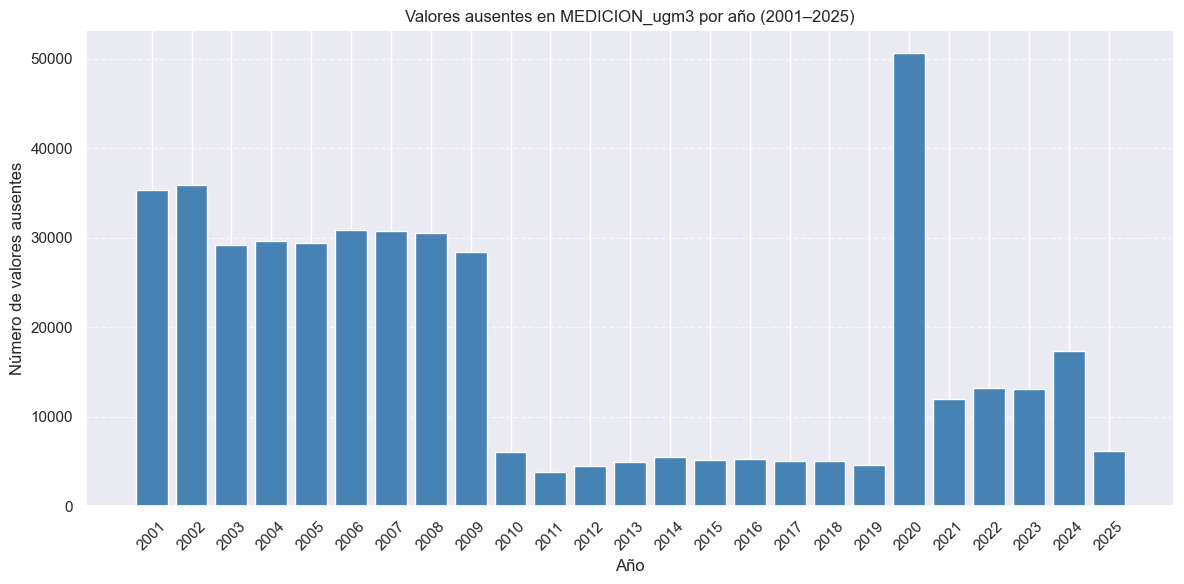

In [14]:
# Extraigo el año
df['ANO'] = df['DIA/MES/ANO'].dt.year

# Filtro solo los registros donde MEDICION_ugm3 es NaN
df_na = df[df['MEDICION_ugm3'].isna()]

# Cuento valores ausentes por año
na_por_ano = df_na.groupby('ANO').size().reset_index(name='missing_count') # El resultado es un DataFrame con dos columnas: 'ANO' y 'missing_count'

# Creo un rango de años de 2001 a 2025
# Esto asegura que aunque en algún año no haya datos ausentes, ese año aparecerá en el gráfico con un valor de 0
todos_los_anos = pd.DataFrame({'ANO': list(range(2001, 2026))})

# Hago un merge entre la tabla completa de años y los datos de ausentes por año
# Esto me permite tener una fila para cada año, incluso si no hubo datos ausentes
na_por_ano_completo = todos_los_anos.merge(na_por_ano, on='ANO', how='left').fillna(0)

# Convierto la columna 'missing_count' a enteros (porque después del merge y fillna eran float)
na_por_ano_completo['missing_count'] = na_por_ano_completo['missing_count'].astype(int)

# Creo el gráfico de barras
plt.figure(figsize=(12, 6)) # Tamaño de la figura
# Dibujo las barras con los años en el eje X y el número de ausentes en el eje Y
plt.bar(na_por_ano_completo['ANO'], na_por_ano_completo['missing_count'], color='steelblue')
# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Número de valores ausentes')
plt.title('Valores ausentes en MEDICION_ugm3 por año (2001–2025)')
# Ajusto las etiquetas del eje X para que estén rotadas y se lean bien
plt.xticks(todos_los_anos['ANO'], rotation=45)
# Añado líneas de rejilla en el eje Y para facilitar la lectura visual
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Ajusto automáticamente el layout para que no se recorten los elementos
plt.tight_layout()
# Muestro el gráfico
plt.show()

CONCLUSIONES:

1. Gran parte de los valores ausente de la variable MEDICION_ugm3 se encuentran anterior al año 2010.
2. En 2020 hubo un gran número de datos ausentes.
   

Dada la conclusion primera de arriba, procedo a eliminar las instancias anterirores al 01 de enero de 2010, de modo que:

In [15]:
# Filtrar el dataframe para conservar solo las fechas desde 2010 en adelante
df = df[df['DIA/MES/ANO'] >= '2010-01-01']

Vuelvo a estudiar el % de valores ausentes de la variable MEDICION_ugm3

In [16]:
# Se monta una tabla 
na_table = pd.DataFrame({
    'column': df.columns,
    'missing_values': df.isna().sum().values,
    'missing_percentage': (df.isna().sum().values / len(df)) * 100
})

# Se ordena la tabla por número de valores ausentes
na_table = na_table.sort_values(by='missing_values', ascending=False)

# Reseteamos los índices una vez la tabla ha sido ordenada
na_table.reset_index(drop=True, inplace=True)

# Filtro solo la fila correspondiente a la columna 'MEDICION_ugm3'
na_medicion = na_table[na_table['column'] == 'MEDICION_ugm3']

# Muestro el resultado
display(na_medicion)

,column,missing_values,missing_percentage
0,MEDICION_ugm3,162670,17.632075


Se observa que prácticamente la mitad de los valores ausentes de la variable MEDICION_ugm3 se encontraban entre los años 2001 y 2009, por lo qu se decide prescindir de ellos para el resto del estudio

Pero oye, quiero ahora saber de ese 17,63% de datos ausentes cuales corresponden a que MAGNITUD, de modo que:

### ANÁLISIS VARIABLE MAGNITUD

Procedo primero a pasar la variable MAGNITUD a categórica

In [17]:
df['MAGNITUD'] = df['MAGNITUD'].astype("category")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922580 entries, 3287 to 1458360
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ESTACION                 922580 non-null  int64         
 1   MAGNITUD                 922580 non-null  category      
 2   TECNICA                  922580 non-null  category      
 3   DIA/MES/ANO              922580 non-null  datetime64[ns]
 4   MEDICION_ugm3            759910 non-null  float64       
 5   TEMPERATURA_MAX (°C)     922580 non-null  float64       
 6   TEMPERATURA_MIN (°C)     922580 non-null  float64       
 7   TEMPERATURA_MED (°C)     922580 non-null  float64       
 8   PRECIPITACIONES (mm)     922580 non-null  float64       
 9   HUMEDAD_MAX (%)          922580 non-null  float64       
 10  HUMEDAD_MIN (%)          922580 non-null  float64       
 11  HUMEDAD_MED (%)          922580 non-null  float64       
 12  NIEVE (cm)       

A continuación, procedo a hallar el número de valores NAs en la variable MEDICION_ugm3 para cada nivel de la variable "MAGNITUD"

In [19]:
# Cuento NAs y total de instancias por cada nivel de MAGNITUD
tabla_na = (
    df.groupby("MAGNITUD", observed=True)["MEDICION_ugm3"]
      .agg(NA_count=lambda x: x.isna().sum(), 
           total_count="size")
      .reset_index()
)

# % de datos ausentes y orden descendente por ese %
tabla_na["Missing_porcentaje"] = (tabla_na["NA_count"] / tabla_na["total_count"] * 100).round(2)
tabla_na = tabla_na.sort_values("Missing_porcentaje", ascending=False).reset_index(drop=True)

# Reordeno columnas
tabla_na = tabla_na[["MAGNITUD", "NA_count", "total_count", "Missing_porcentaje"]]

display(tabla_na)

,MAGNITUD,NA_count,total_count,Missing_porcentaje
0,9,33174,67920,48.84
1,43,10973,22640,48.47
2,44,10973,22640,48.47
3,42,10973,22640,48.47
4,1,14168,56600,25.03
5,10,20332,84900,23.95
6,6,13484,56600,23.82
7,35,3993,33960,11.76
8,20,3980,33960,11.72
9,30,3947,33960,11.62


In [20]:
print(f"Total de valores en el dataframe: {len(df)}")

Total de valores en el dataframe: 922580


In [21]:
print(f"Total de valores según la tabla anterior': {tabla_na['total_count'].sum()}")

Total de valores según la tabla anterior': 922580


In [22]:
print(f"Total de valores faltantes en 'MEDICION_ugm3': {tabla_na['NA_count'].sum()}")

Total de valores faltantes en 'MEDICION_ugm3': 162670


Se observa que una de las magnitudes que mayor número de datos ausentes presenta con este dataframe es la 9, la cual representa las particular final con diámetro menor de 2.5 micrometros. Esta partícula es muy representativa e importante en el estudio de la calidad del aire de una ciudad por lo que no podemos presncidir de ella, a pesar de que casi el 50% de las instancias están ausentes. Veamos en que años se concentran estas ausencias de datos para esta variable.

In [23]:
df_subset_pm2_5 = df[df["MAGNITUD"] == 9]

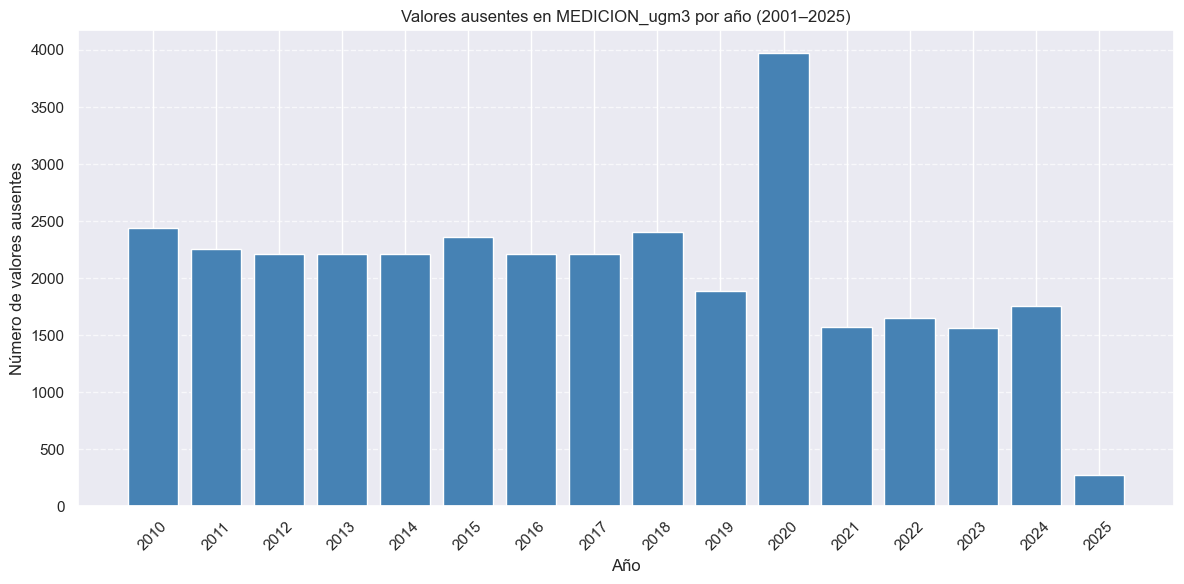

In [24]:
# Filtro solo los registros donde MEDICION_ugm3 es NaN
df_na = df_subset_pm2_5[df_subset_pm2_5['MEDICION_ugm3'].isna()]

# Cuento valores ausentes por año
na_por_ano = df_na.groupby('ANO').size().reset_index(name='missing_count') # El resultado es un DataFrame con dos columnas: 'ANO' y 'missing_count'

# Creo un rango de años de 2001 a 2025
# Esto asegura que aunque en algún año no haya datos ausentes, ese año aparecerá en el gráfico con un valor de 0
todos_los_anos = pd.DataFrame({'ANO': list(range(2010, 2026))})

# Hago un merge entre la tabla completa de años y los datos de ausentes por año
# Esto me permite tener una fila para cada año, incluso si no hubo datos ausentes
na_por_ano_completo = todos_los_anos.merge(na_por_ano, on='ANO', how='left').fillna(0)

# Convierto la columna 'missing_count' a enteros (porque después del merge y fillna eran float)
na_por_ano_completo['missing_count'] = na_por_ano_completo['missing_count'].astype(int)

# Creo el gráfico de barras
plt.figure(figsize=(12, 6)) # Tamaño de la figura
# Dibujo las barras con los años en el eje X y el número de ausentes en el eje Y
plt.bar(na_por_ano_completo['ANO'], na_por_ano_completo['missing_count'], color='steelblue')
# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Número de valores ausentes')
plt.title('Valores ausentes en MEDICION_ugm3 por año (2001–2025)')
# Ajusto las etiquetas del eje X para que estén rotadas y se lean bien
plt.xticks(todos_los_anos['ANO'], rotation=45)
# Añado líneas de rejilla en el eje Y para facilitar la lectura visual
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Ajusto automáticamente el layout para que no se recorten los elementos
plt.tight_layout()
# Muestro el gráfico
plt.show()

Todos los datos ausentes se distribuyen, más o menos, de manera homogénea durante todos los años, a excepción del año 2020

### ANÁLISIS VARIABLE ESTACIÓN

#### VALORES AUSENTES - ESTACIÓN 9

Quiero analizar cuales son las estaciones que aportan mayor número de valores ausentes en la variable MEDICION_ugm3 y sobretodo en la MEDICIÓN igual a 9. Procedo del siguiente modo

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922580 entries, 3287 to 1458360
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ESTACION                 922580 non-null  int64         
 1   MAGNITUD                 922580 non-null  category      
 2   TECNICA                  922580 non-null  category      
 3   DIA/MES/ANO              922580 non-null  datetime64[ns]
 4   MEDICION_ugm3            759910 non-null  float64       
 5   TEMPERATURA_MAX (°C)     922580 non-null  float64       
 6   TEMPERATURA_MIN (°C)     922580 non-null  float64       
 7   TEMPERATURA_MED (°C)     922580 non-null  float64       
 8   PRECIPITACIONES (mm)     922580 non-null  float64       
 9   HUMEDAD_MAX (%)          922580 non-null  float64       
 10  HUMEDAD_MIN (%)          922580 non-null  float64       
 11  HUMEDAD_MED (%)          922580 non-null  float64       
 12  NIEVE (cm)       

In [26]:
# Reordeno columnas para que "DIA/MES/ANO" sea la primera
cols = ["DIA/MES/ANO"] + [col for col in df.columns if col != "DIA/MES/ANO"]
df = df[cols]

# Mostrar las primeras filas
display(df.head())

,DIA/MES/ANO,ESTACION,MAGNITUD,TECNICA,MEDICION_ugm3,TEMPERATURA_MAX (°C),TEMPERATURA_MIN (°C),TEMPERATURA_MED (°C),PRECIPITACIONES (mm),HUMEDAD_MAX (%),...,VIENTO_MIN_100 (km/h),VIENTO_MED_100 (km/h),VIENTO_DIR_100 (°),NUBES (%),HORAS_SOL (min),RADIACION_SOLAR (W/mÂ²),PRESION_MAX (hPa),PRESION_MIN (hPa),PRESION_MED (hPa),ANO
3287,2010-01-01,4,1,38,12.0,8.833577,4.033577,5.879828,0.100000,81.779030,...,18.043148,28.416998,238.27025,55.933334,227.164660,1329.0,1017.5,1007.3,1011.06665,2010
3288,2010-01-02,4,1,38,15.0,7.433577,1.633577,5.113994,0.000000,91.992530,...,1.800000,8.827096,214.30350,59.087498,92.617860,1262.0,1022.7,1017.6,1020.66656,2010
3289,2010-01-03,4,1,38,17.0,6.893577,3.553577,5.551910,3.200000,95.715294,...,1.835647,7.187243,182.42377,89.041664,40.621723,725.0,1020.7,1015.5,1018.64580,2010
3290,2010-01-04,4,1,38,16.0,8.423577,5.983577,7.413578,10.900001,97.863980,...,6.877790,10.584868,116.39993,90.250000,0.676768,498.0,1014.8,1001.5,1007.65010,2010
3291,2010-01-05,4,1,38,16.0,10.783577,6.013578,8.091077,1.900000,96.731870,...,4.510787,10.179250,343.52313,74.708336,214.730650,1436.0,1004.4,1000.0,1001.49994,2010


Paso la variable ESTACION a categórica

In [27]:
df['ESTACION'] = df['ESTACION'].astype('category')

In [28]:
df['ESTACION'].nunique()
df['ESTACION'].cat.categories

Index([ 4,  8, 11, 16, 17, 18, 24, 27, 35, 36, 38, 39, 40, 47, 48, 49, 50, 54,
       55, 56, 57, 58, 59, 60],
      dtype='int64')

Sacamos una tabla donde se indique el número de valores ausentes por cada una de las estaciones filtrando primero por MAGNITUD igual a 9.

In [29]:
df_subset_pm2_5 = df[df["MAGNITUD"] == 9]

In [30]:
# 1. Inicializamos la lista de resultados
resultado_estaciones = []

# 2. Recorremos cada nivel de la variable categórica ESTACION
for estacion in df_subset_pm2_5['ESTACION'].cat.categories:
    subset = df_subset_pm2_5[df_subset_pm2_5['ESTACION'] == estacion]
    missing_count = subset["MEDICION_ugm3"].isna().sum()
    total = len(subset)

    resultado_estaciones.append({
        "ESTACION": estacion,
        "Total registros": total,
        "Faltantes en MEDICION_ugm3": missing_count,
        "Porcentaje faltantes": (missing_count / total * 100) if total > 0 else 0
    })

# 3. Convertimos a DataFrame y ordenamos
df_resultado_estaciones = pd.DataFrame(resultado_estaciones).sort_values(by="Porcentaje faltantes", ascending=False)

# 4. Mostramos la tabla
display(df_resultado_estaciones)

,ESTACION,Total registros,Faltantes en MEDICION_ugm3,Porcentaje faltantes
17,54,5660,5509,97.332155
0,4,5660,5491,97.014134
23,60,5660,5481,96.837456
20,57,11320,9744,86.077739
19,56,5660,3657,64.611307
6,24,5660,642,11.342756
14,48,5660,626,11.060071
16,50,5660,566,10.000000
1,8,5660,531,9.381625
10,38,5660,468,8.268551


In [31]:
print(f"Total de valores faltantes en 'MEDICION_ugm3': {df_resultado_estaciones['Faltantes en MEDICION_ugm3'].sum()}")

Total de valores faltantes en 'MEDICION_ugm3': 33174


Se observa que claramente estos valores ausentes se encuentran en las estaciones 54, 4, 60, 57 y 56. Procedo a la eliminación de todas las instancias con estas estaciones del dataframe original.

#### EXCLUSIÓN ESTACIONES POR VALORES AUSENTES ESTACIÓN 9

In [32]:
# Lista de estaciones a excluir
estaciones_a_excluir = [54, 4, 60, 57, 56]

# Nuevo dataframe sin esas estaciones
df_prueba = df[~df['ESTACION'].isin(estaciones_a_excluir)].copy()

df_prueba['ESTACION'] = df_prueba['ESTACION'].cat.remove_categories(estaciones_a_excluir)

Compruebo si, tras esta eliminación de instancias, se ha quedado alguna fecha sin valor en la variable "MEDICION_ugm3"

In [33]:
# 1. Creo el rango completo de fechas
fechas_completas = pd.date_range(start='2010-01-01', end='2025-06-30', freq='D')

# 2. Extraigo las fechas únicas del dataframe
fechas_df = df_prueba['DIA/MES/ANO'].dropna().unique()
fechas_df = pd.to_datetime(fechas_df)

# 3. Creo un conjunto de fechas
fechas_faltantes = sorted(set(fechas_completas) - set(fechas_df))

# 4. Muestro cuántas y cuáles faltan
print(f"Faltan {len(fechas_faltantes)} días.")
for fecha in fechas_faltantes:
    print(fecha.strftime("%Y-%m-%d"))

Faltan 0 días.


In [34]:
df_subset_pm2_5_prueba = df_prueba[df_prueba["MAGNITUD"] == 9]

In [35]:
# 1. Creo el rango completo de fechas
fechas_completas = pd.date_range(start='2010-01-01', end='2025-06-30', freq='D')

# 2. Extraigo las fechas únicas del dataframe
fechas_df = df_subset_pm2_5_prueba['DIA/MES/ANO'].dropna().unique()
fechas_df = pd.to_datetime(fechas_df)

# 3. Creo un conjunto de fechas
fechas_faltantes = sorted(set(fechas_completas) - set(fechas_df))

# 4. Muestro cuántas y cuáles faltan
print(f"Faltan {len(fechas_faltantes)} días.")
for fecha in fechas_faltantes:
    print(fecha.strftime("%Y-%m-%d"))

Faltan 0 días.


Observo como han cambiado los datos ausentes en cada una de las magnitudes tras la eliminación de varias estaciones:

In [36]:
# Cuento NAs y total de instancias por cada nivel de MAGNITUD
tabla_na = (
    df_prueba.groupby("MAGNITUD", observed=True)["MEDICION_ugm3"]
      .agg(NA_count=lambda x: x.isna().sum(), 
           total_count="size")
      .reset_index()
)

# % de datos ausentes y orden descendente por ese %
tabla_na["Missing_porcentaje"] = (tabla_na["NA_count"] / tabla_na["total_count"] * 100).round(2)
tabla_na = tabla_na.sort_values("Missing_porcentaje", ascending=False).reset_index(drop=True)

# Reordeno columnas
tabla_na = tabla_na[["MAGNITUD", "NA_count", "total_count", "Missing_porcentaje"]]

display(tabla_na)

,MAGNITUD,NA_count,total_count,Missing_porcentaje
0,44,10973,22640,48.47
1,43,10973,22640,48.47
2,42,10973,22640,48.47
3,6,10492,39620,26.48
4,1,11457,45280,25.30
5,35,3993,33960,11.76
6,20,3980,33960,11.72
7,30,3947,33960,11.62
8,9,3292,33960,9.69
9,10,4857,56600,8.58


Se observa que la MAGNITUD 9 ya no tiene tantos valores ausentes. Ahora habría que eliminar las instancias correspondientes a las MAGNITUDES 44, 43 y 42

#### ELIMINACION MAGNITUDES 42, 43 y 44

Dados estos resultados, procedo a:

1. Eliminar las instancias (filas) correspondientes a los niveles de MAGNITUD igual a 44, 43 y 42.
2. Eliminar estas columnas del dataframe.

In [37]:
# Elimino filas donde MAGNITUD sea 44, 43 o 42
df_limpio = df_prueba[~df_prueba["MAGNITUD"].isin([44, 43, 42])]

# Muestro resultado
display(df_limpio["MAGNITUD"].unique())  # Para verificar que ya no están esos valores
display(df_prueba["MAGNITUD"].unique())  # Para verificar que ya no están esos valores

df_limpio.reset_index(drop=True, inplace=True)

[1, 6, 7, 8, 12, ..., 14, 20, 30, 35, 9]
Length: 11
Categories (14, int64): [1, 6, 7, 8, ..., 35, 42, 43, 44]

[1, 6, 7, 8, 12, ..., 35, 42, 43, 44, 9]
Length: 14
Categories (14, int64): [1, 6, 7, 8, ..., 35, 42, 43, 44]

In [38]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662220 entries, 0 to 662219
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DIA/MES/ANO              662220 non-null  datetime64[ns]
 1   ESTACION                 662220 non-null  category      
 2   MAGNITUD                 662220 non-null  category      
 3   TECNICA                  662220 non-null  category      
 4   MEDICION_ugm3            592569 non-null  float64       
 5   TEMPERATURA_MAX (°C)     662220 non-null  float64       
 6   TEMPERATURA_MIN (°C)     662220 non-null  float64       
 7   TEMPERATURA_MED (°C)     662220 non-null  float64       
 8   PRECIPITACIONES (mm)     662220 non-null  float64       
 9   HUMEDAD_MAX (%)          662220 non-null  float64       
 10  HUMEDAD_MIN (%)          662220 non-null  float64       
 11  HUMEDAD_MED (%)          662220 non-null  float64       
 12  NIEVE (cm)      

Observo que % de valores de MEDICIÓN_ugm3 están ausentes ahora

In [39]:
# Se monta una tabla 
na_table = pd.DataFrame({
    'column': df_limpio.columns,
    'missing_values': df_limpio.isna().sum().values,
    'missing_percentage': (df_limpio.isna().sum().values / len(df)) * 100
})

# Se ordena la tabla por número de valores ausentes
na_table = na_table.sort_values(by='missing_values', ascending=False)

# Reseteamos los índices una vez la tabla ha sido ordenada
na_table.reset_index(drop=True, inplace=True)

# Filtro solo la fila correspondiente a la columna 'MEDICION_ugm3'
na_medicion = na_table[na_table['column'] == 'MEDICION_ugm3']

# Muestro el resultado
display(na_medicion)

,column,missing_values,missing_percentage
0,MEDICION_ugm3,69651,7.549589


Tras estos últimos tratamientos, el número de valores ausentes en la variable MEDICION_ugm3 de ha reducido a un 7.5 %

Saco los distintos niveles que presenta la variable ESTACIÓN tras la limpieza de la última limpieza de la base de datos y observo de donde provienen la mayor parte de los datos de "MEDICION_ugm3"

In [40]:
niveles = df_limpio['ESTACION'].cat.categories
frecuencias = df_limpio['ESTACION'].value_counts().reindex(niveles, fill_value=0)
tabla_completa = frecuencias.reset_index()
tabla_completa.columns = ['Nivel', 'Frecuencia']

# Añado la frecuencia relativa (%)
tabla_completa['Proporcion (%)'] = (
    (tabla_completa['Frecuencia'] / tabla_completa['Frecuencia'].sum()) * 100
).round(2)

display(tabla_completa)

,Nivel,Frecuencia,Proporcion (%)
0,8,62260,9.40
1,11,33960,5.13
2,16,28300,4.27
3,17,28300,4.27
4,18,56600,8.55
5,24,62260,9.40
6,27,22640,3.42
7,35,33960,5.13
8,36,33960,5.13
9,38,50940,7.69


#### GEOREFERENCIACIÓN ESTACIONES

Saco un listado con información de todas las estaciones instaladas por medio de la lectura de un Excel encontrado en el siguiente link: https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=9e42c176313eb410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

In [41]:
df_estaciones = pd.read_excel("96_25.08.07_informacion_estaciones_red_calidad_aire.xls")

In [42]:
df_estaciones.head()

,CODIGO,CODIGO_CORTO,ESTACION,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,COD_TIPO,NOM_TIPO,NO2,...,BTX,COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,Fecha alta,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
0,28079004,4,Plaza de España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637,UT,Urbana tráfico,X,...,NaN,273600,PLAZA,DE,ESPAÑA,1998-12-01,439579.329073,4.475049e+06,-3.712257,40.423882
1,28079008,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672,UT,Urbana tráfico,X,...,X,18900,CALLE,DE,ALCALA,1998-12-01,442117.236578,4.474771e+06,-3.682316,40.421553
2,28079011,11,Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,"3°40'38.50""O","40°27'5.29""N",709,UT,Urbana tráfico,X,...,X,610450,CALLE,DEL,PRINCIPE DE VERGARA,1998-12-01,442564.045713,4.478089e+06,-3.677349,40.451473
3,28079016,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695,UF,Urbana fondo,X,...,NaN,798700,CALLE,DEL,VIZCONDE DE LOS ASILOS,1998-12-01,445786.172865,4.476796e+06,-3.639242,40.440046
4,28079017,17,Villaverde,C/ Juan Peñalver,"3°42'47.89""O","40°20'49.74""N",601,UF,Urbana fondo,X,...,NaN,417200,CALLE,DE,JUAN PEÑALVER,1998-12-01,439420.701532,4.466532e+06,-3.713317,40.347147


In [43]:
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CODIGO               24 non-null     int64         
 1   CODIGO_CORTO         24 non-null     int64         
 2   ESTACION             24 non-null     object        
 3   DIRECCION            24 non-null     object        
 4   LONGITUD_ETRS89      24 non-null     object        
 5   LATITUD_ETRS89       24 non-null     object        
 6   ALTITUD              24 non-null     int64         
 7   COD_TIPO             24 non-null     object        
 8   NOM_TIPO             24 non-null     object        
 9   NO2                  24 non-null     object        
 10  SO2                  4 non-null      object        
 11  CO                   4 non-null      object        
 12  PM10                 13 non-null     object        
 13  PM2_5                8 non-null      

Me quedo solo con las variables "CÓDIGO_CORTO", "LONGITUD" y "LATITUD":

In [44]:
df_estaciones = df_estaciones[['CODIGO_CORTO', 'LONGITUD', 'LATITUD']]

In [45]:
df_estaciones.head()

,CODIGO_CORTO,LONGITUD,LATITUD
0,4,-3.712257,40.423882
1,8,-3.682316,40.421553
2,11,-3.677349,40.451473
3,16,-3.639242,40.440046
4,17,-3.713317,40.347147


In [46]:
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CODIGO_CORTO  24 non-null     int64  
 1   LONGITUD      24 non-null     float64
 2   LATITUD       24 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


Filtro el dataframe anterior de las estaciones por los niveles que tenía en el dataframe original:

In [47]:
# Pasar la variable "CODIGO_CORTO" a variable categórica:
df_estaciones['CODIGO_CORTO'] = df_estaciones['CODIGO_CORTO'].astype('category')
# Filtrado con copia segura
df_estaciones_filtrado = df_estaciones[df_estaciones['CODIGO_CORTO'].isin(niveles)].copy()

# Limpia categorías no usadas
df_estaciones_filtrado['CODIGO_CORTO'] = df_estaciones_filtrado['CODIGO_CORTO'].cat.remove_unused_categories()

# Extrae categorías presentes
codigos_encontrados = df_estaciones_filtrado['CODIGO_CORTO'].cat.categories

print("Estaciones Dataframe Original:", niveles.tolist())
print("Códigos coincidentes:", codigos_encontrados.tolist())

son_iguales = set(niveles) == set(codigos_encontrados)
print("¿Coinciden los niveles?", son_iguales)

Estaciones Dataframe Original: [8, 11, 16, 17, 18, 24, 27, 35, 36, 38, 39, 40, 47, 48, 49, 50, 55, 58, 59]
Códigos coincidentes: [8, 11, 16, 17, 18, 24, 27, 35, 36, 38, 39, 40, 47, 48, 49, 50, 55, 58, 59]
¿Coinciden los niveles? True


Se compueba que ambos dataframes contienen las mismas estaciones en sus variables correspondientes

In [48]:
df_estaciones_filtrado.head(10)

,CODIGO_CORTO,LONGITUD,LATITUD
1,8,-3.682316,40.421553
2,11,-3.677349,40.451473
3,16,-3.639242,40.440046
4,17,-3.713317,40.347147
5,18,-3.731836,40.394782
6,24,-3.747345,40.419358
7,27,-3.580026,40.476918
8,35,-3.703166,40.419209
9,36,-3.645310,40.407952
10,38,-3.707130,40.445544


Representacion georreferenciada de cada una de las estaciones que quedan en el dataframe original:

In [49]:
# Creo mapa centrado tomando la media de todas las latitudes y longitudes:

centro = [df_estaciones_filtrado['LATITUD'].mean(), df_estaciones_filtrado['LONGITUD'].mean()]
m = folium.Map(location=centro, zoom_start=12, tiles='Esri.WorldImagery')  # ortofoto

# Añado chinchetas para cada estación
for _, row in df_estaciones_filtrado.iterrows():
    folium.Marker(
        location=[row['LATITUD'], row['LONGITUD']],
        popup=f"Estación {row['CODIGO_CORTO']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

# Guardo mapa como archivo HTML interactivo
m.save("02_25.08.07_mapa_estaciones_calidad_aire.html")

# Muestro el mapa
display(m)


Quiero ahora agrupar las estaciones por zonas en función de sus valores de latitud y longitud: Noreste, Norte, Noroeste, Este, Centro, Oeste, Sureste, Sur y Suroeste.

De modo que:

In [50]:
# Calculos los percentiles 30 y 60:
lat_30 = df_estaciones_filtrado['LATITUD'].quantile(0.30)
lat_60 = df_estaciones_filtrado['LATITUD'].quantile(0.60)
lon_30 = df_estaciones_filtrado['LONGITUD'].quantile(0.30)
lon_60 = df_estaciones_filtrado['LONGITUD'].quantile(0.60)

# Asignar zona al DataFrame
df_estaciones_filtrado['ZONA'] = df_estaciones_filtrado.apply(
    lambda row: asignar_zona(row['LATITUD'], row['LONGITUD']), axis=1
)

Voy a ver que estación hay en cada zona

In [51]:
# Agrupo por zona y muestro códigos de estación
zonas_estaciones = df_estaciones_filtrado.groupby('ZONA')['CODIGO_CORTO'].apply(list)

# Mostrar resultados
for zona, estaciones in zonas_estaciones.items():
    print(f"{zona}: {sorted(estaciones)}")

# Saco un conteo de cada zona
conteo = df_estaciones_filtrado['ZONA'].value_counts()
print(conteo)

Centro: [35, 48]
Este: [8, 16]
Norte: [50]
NorteEste: [11, 27, 55, 59]
NorteOeste: [38, 39, 58]
Oeste: [24]
Sur: [47, 49]
SurEste: [36, 40]
SurOeste: [17, 18]
ZONA
NorteEste     4
NorteOeste    3
Este          2
Centro        2
SurOeste      2
Sur           2
SurEste       2
Oeste         1
Norte         1
Name: count, dtype: int64


Renombro algunas de las zonas

In [52]:
# Renombrar las zonas compuestas a formato estándar
df_estaciones_filtrado['ZONA'] = df_estaciones_filtrado['ZONA'].replace({
    'NorteEste': 'Noreste',
    'NorteOeste': 'Noroeste',
    'SurEste': 'Sureste',
    'SurOeste': 'Suroeste'
})

Las represento sobre mapa:

In [53]:
# Asignamos un color distinto a cada zona
colores_zonas = {
    'NorteEste': 'blue',
    'Norte': 'darkblue',
    'Noreste': 'cadetblue',
    'Oeste': 'orange',
    'Centro': 'red',
    'Este': 'lightred',
    'Suroeste': 'purple',
    'Sur': 'green',
    'Sureste': 'lightgreen',
    'Sin clasificar': 'gray'
}

In [54]:
# Añadir chinchetas coloreadas por zona
for _, row in df_estaciones_filtrado.iterrows(): # Es una forma muy común en pandas para iterar fila por fila en un DataFrame.
    # df_estaciones_filtrado.iterrows() --> Método de pandas que devuelve un generador que produce pares (índice, fila) del DataFrame, uno a uno.
    # for _, row in ... --> Se hace un bucle sobre esos pares.
    # _ Es una convención para decir "no me interesa el índice" (aunque está disponible si lo necesitas).
    # row --> Es una Serie de pandas que representa una fila del DataFrame, con los nombres de columnas como índice.
    zona = row['ZONA']
    color = colores_zonas.get(zona, 'gray')  # default: gris si zona no conocida
    
    folium.Marker(
        location=[row['LATITUD'], row['LONGITUD']],
        popup=f"Estación {row['CODIGO_CORTO']}<br>ZONA: {zona}",
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(m)

# Mostrar el mapa en Jupyter
display(m)

# Guardar también como HTML si quieres
m.save("02_25.08.07_mapa_estaciones_coloreado_por_zona.html")

Se observa que ninguna estación cae en zona SURESTE.

Paso la nueva variable ZONA a categórica

In [55]:
# Paso la variable "ZONA" a variable categórica:
df_estaciones_filtrado['ZONA'] = df_estaciones_filtrado['ZONA'].astype('category')

Exporto ahora en .csv las latitudes y longitudes que han definido las zonas.

In [56]:
# Guardo los percentiles en un diccionario
percentiles = {
    'PERCENTIL': ['lat_30', 'lat_60', 'lon_30', 'lon_60'],
    'VALOR': [lat_30, lat_60, lon_30, lon_60]
}

df_percentiles = pd.DataFrame(percentiles)

Exporto a .csv

In [57]:
df_percentiles.to_csv('02_25.08.07_percentiles_lat_lon.csv', index=False)

#### CREACIÓN NUEVA VARIABLE ZONA_ESTACIÓN EN DATAFRAME BASE

In [58]:
df_estaciones_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 1 to 22
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CODIGO_CORTO  19 non-null     category
 1   LONGITUD      19 non-null     float64 
 2   LATITUD       19 non-null     float64 
 3   ZONA          19 non-null     category
dtypes: category(2), float64(2)
memory usage: 1018.0 bytes


In [59]:
# Renombro CODIGO_CORTO a ESTACION para poder hacer el merge
df_estaciones_filtrado = df_estaciones_filtrado.rename(columns={'CODIGO_CORTO': 'ESTACION'})

# Paso la variable "ESTACION" a variable categórica:
df_estaciones_filtrado['ESTACION'] = df_estaciones_filtrado['ESTACION'].astype('category')

# Hacer el merge para añadir la columna ZONA al dataframe base.
df_base = df_limpio.merge(
    df_estaciones_filtrado[['ESTACION', 'ZONA']],
    how='left',
    on='ESTACION'
)

# Renombro la columna resultante a ZONA_ESTACION
df_base = df_base.rename(columns={'ZONA': 'ZONA_ESTACION'})

# Verifico que se ha hecho correctamente
print(df_base[['ESTACION', 'ZONA_ESTACION']].head())
print(df_base[['ESTACION', 'ZONA_ESTACION']].tail())

  ESTACION ZONA_ESTACION
0        8          Este
1        8          Este
2        8          Este
3        8          Este
4        8          Este
       ESTACION ZONA_ESTACION
662215       48        Centro
662216       48        Centro
662217       48        Centro
662218       48        Centro
662219       48        Centro


Parece que se han imputado correctamente

Elimino la variable ESTACION y la variable ANO (si hace falta, se vuelve a crear más adelante)

In [60]:
df_base = df_base.drop(columns=['ESTACION'])
df_base = df_base.drop(columns=['ANO'])

Elimino también la variable TECNICA puesto que en puridad va a tener una relación directa con las magnitudes

In [61]:
df_base = df_base.drop(columns=['TECNICA'])

In [62]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662220 entries, 0 to 662219
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DIA/MES/ANO              662220 non-null  datetime64[ns]
 1   MAGNITUD                 662220 non-null  category      
 2   MEDICION_ugm3            592569 non-null  float64       
 3   TEMPERATURA_MAX (°C)     662220 non-null  float64       
 4   TEMPERATURA_MIN (°C)     662220 non-null  float64       
 5   TEMPERATURA_MED (°C)     662220 non-null  float64       
 6   PRECIPITACIONES (mm)     662220 non-null  float64       
 7   HUMEDAD_MAX (%)          662220 non-null  float64       
 8   HUMEDAD_MIN (%)          662220 non-null  float64       
 9   HUMEDAD_MED (%)          662220 non-null  float64       
 10  NIEVE (cm)               662220 non-null  float64       
 11  VIENTO_MAX_10 (km/h)     662220 non-null  float64       
 12  VIENTO_MIN_10 (k

Por último agrupo las instancias haciendo medias sobre las variables numéricas cuando estas instancias tengan los mismos valores en las variables categóricas, en la variable temporal y en la variable "MAGNITUD". De modo que:

In [63]:
# Listo las variables numéricas a promediar
vars_numericas = [
    'MEDICION_ugm3', 'TEMPERATURA_MAX (°C)', 'TEMPERATURA_MIN (°C)', 'TEMPERATURA_MED (°C)',
    'PRECIPITACIONES (mm)', 'HUMEDAD_MAX (%)', 'HUMEDAD_MIN (%)', 'HUMEDAD_MED (%)',
    'NIEVE (cm)', 'VIENTO_MAX_10 (km/h)', 'VIENTO_MIN_10 (km/h)', 'VIENTO_MED_10 (km/h)',
    'VIENTO_DIR_10 (°)', 'VIENTO_MAX_100 (km/h)', 'VIENTO_MIN_100 (km/h)', 'VIENTO_MED_100 (km/h)',
    'VIENTO_DIR_100 (°)', 'NUBES (%)', 'HORAS_SOL (min)', 'RADIACION_SOLAR (W/mÂ²)',
    'PRESION_MAX (hPa)', 'PRESION_MIN (hPa)', 'PRESION_MED (hPa)'
]

# Agrupo por fecha, zona y secuencia de dummies
df_grouped = df_base.groupby(['DIA/MES/ANO', 'ZONA_ESTACION', 'MAGNITUD'], observed=True)[vars_numericas].mean().reset_index()


COMPROBACIONES

Saco información del dataframe generado

In [64]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430160 entries, 0 to 430159
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DIA/MES/ANO              430160 non-null  datetime64[ns]
 1   ZONA_ESTACION            430160 non-null  category      
 2   MAGNITUD                 430160 non-null  category      
 3   MEDICION_ugm3            385174 non-null  float64       
 4   TEMPERATURA_MAX (°C)     430160 non-null  float64       
 5   TEMPERATURA_MIN (°C)     430160 non-null  float64       
 6   TEMPERATURA_MED (°C)     430160 non-null  float64       
 7   PRECIPITACIONES (mm)     430160 non-null  float64       
 8   HUMEDAD_MAX (%)          430160 non-null  float64       
 9   HUMEDAD_MIN (%)          430160 non-null  float64       
 10  HUMEDAD_MED (%)          430160 non-null  float64       
 11  NIEVE (cm)               430160 non-null  float64       
 12  VIENTO_MAX_10 (k

Observo el número de valores ausentes en la variable MEDICION_ugm3

In [65]:
# Se monta una tabla 
na_table = pd.DataFrame({
    'column': df_grouped.columns,
    'missing_values': df_grouped.isna().sum().values,
    'missing_percentage': (df_grouped.isna().sum().values / len(df)) * 100
})

# Se ordena la tabla por número de valores ausentes
na_table = na_table.sort_values(by='missing_values', ascending=False)

# Reseteamos los índices una vez la tabla ha sido ordenada
na_table.reset_index(drop=True, inplace=True)

# Filtro solo la fila correspondiente a la columna 'MEDICION_ugm3'
na_medicion = na_table[na_table['column'] == 'MEDICION_ugm3']

# Muestro el resultado
display(na_medicion)

,column,missing_values,missing_percentage
0,MEDICION_ugm3,44986,4.876108


Tras este tratamiento, el % de datos ausentes en toda la base de datos se reduce a menos del 5%

Compruebo si se ha perdido alguna fecha con este último tratamiento

In [66]:
# Creo el rango completo de fechas
fechas_completas = pd.date_range(start='2010-01-01', end='2025-06-30', freq='D')

# Extraigo las fechas únicas del dataframe
fechas_df = df_grouped['DIA/MES/ANO'].dropna().unique()
fechas_df = pd.to_datetime(fechas_df)

# 3. Crero un conjunto de fechas
fechas_faltantes = sorted(set(fechas_completas) - set(fechas_df))

# 4. Muestro cuántas y cuáles faltan
print(f"Faltan {len(fechas_faltantes)} días.")
for fecha in fechas_faltantes:
    print(fecha.strftime("%Y-%m-%d"))

Faltan 0 días.


Comparo los órdenes (rangos) de magnitud de las distintas maginutes entre los dataframes antes y despues de este último tratamiento

In [67]:
df_rangos = df_grouped.groupby(['MAGNITUD'], observed=True)['MEDICION_ugm3'].agg(['min', 'max']).reset_index()
df_rangos['rango'] = df_rangos['max'] - df_rangos['min']
display(df_rangos.sort_values('rango', ascending=False))

df_rangos = df_base.groupby(['MAGNITUD'], observed=True)['MEDICION_ugm3'].agg(['min', 'max']).reset_index()
df_rangos['rango'] = df_rangos['max'] - df_rangos['min']
display(df_rangos.sort_values('rango', ascending=False))

,MAGNITUD,min,max,rango
1,6,100.0,2000.0,1900.0
6,12,1.0,502.0,501.0
5,10,1.0,462.0,461.0
2,7,0.0,265.0,265.0
3,8,1.0,149.0,148.0
7,14,1.0,126.5,125.5
4,9,1.0,84.0,83.0
8,20,0.1,35.3,35.2
0,1,0.0,29.0,29.0
10,35,0.0,16.6,16.6


,MAGNITUD,min,max,rango
1,6,100.0,2000.0,1900.0
6,12,0.0,666.0,666.0
5,10,1.0,462.0,461.0
2,7,0.0,360.0,360.0
3,8,0.0,165.0,165.0
7,14,1.0,134.0,133.0
4,9,1.0,84.0,83.0
0,1,0.0,41.0,41.0
8,20,0.1,35.3,35.2
10,35,0.0,17.8,17.8


Parece que tiene sentido, por lo que:

In [68]:
df_base = df_grouped

In [69]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430160 entries, 0 to 430159
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DIA/MES/ANO              430160 non-null  datetime64[ns]
 1   ZONA_ESTACION            430160 non-null  category      
 2   MAGNITUD                 430160 non-null  category      
 3   MEDICION_ugm3            385174 non-null  float64       
 4   TEMPERATURA_MAX (°C)     430160 non-null  float64       
 5   TEMPERATURA_MIN (°C)     430160 non-null  float64       
 6   TEMPERATURA_MED (°C)     430160 non-null  float64       
 7   PRECIPITACIONES (mm)     430160 non-null  float64       
 8   HUMEDAD_MAX (%)          430160 non-null  float64       
 9   HUMEDAD_MIN (%)          430160 non-null  float64       
 10  HUMEDAD_MED (%)          430160 non-null  float64       
 11  NIEVE (cm)               430160 non-null  float64       
 12  VIENTO_MAX_10 (k

In [70]:
df_base.to_parquet("02_DATASET_FINAL.parquet", index=False)